In [ ]:
import numpy as np
import pandas as pd # Data Manipulation, Data Cleaning, Data Exploration, Data Visualization
import matplotlib.pyplot as plt
import nltk
import csv

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
df1 = pd.read_csv('/content/text-and-id.txt', error_bad_lines = False, header = None, sep="\n")
df2 = pd.read_csv('/content/pairs-label-training (1).txt', header=None, sep=",", names = ["t1", "t2", "bias"])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#data cleaning

In [ ]:
df2

,,,,,,t1,t2,bias
57 Every person has a right to profess,practice and propagate the religion he or she believes in. Every religious group or sect is free to manage its religious affairs. A right to propagate one s religion,however,does not mean that a person has right to compel another person to convert into his religion by means of force,fraud,inducement or allurement. Of course,a person is free to change religion on his or...,one cannot sacrifice animals or human beings ...,one cannot force a widowed woman to shave hea...
1603 That is,the pigment particles mix with the vehicle in such a way that the particles are distributed in equal distances through out the whole liquid .,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755 The Prime Minister of India is the leader of the ruling party in the Lok Sabha. From the MPs who belong to her party,the Prime Minister selects ministers to work with her to implement decisions. These ministers then take charge of different areas of government functioning like health,education,finance etc.,NaN,NaN,NaN,NaN,NaN
1636 The water you drink now-a-days is not safe .,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
828 I,along with my mother,brothers and sisters brought small bamboos .,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
222 But her agriculture is underdeveloped and productivity is low .,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
926 Teacher : A teacher helps his students with his teachings to be good human beings .,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
490 She should take steps to fulfill demands of family within scarce resources .,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1293 Look carefully at how the tendon joins the muscle.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1

,0
0,"98, 651, 0"
1,"696, 1870, 1"
2,"1073, 1620, 0"
3,"167, 633, 0"
4,"4, 640, 0"
...,...
155946,"546, 1512, 1"
155947,"720, 1902, 1"
155948,"1112, 1591, 0"
155949,"396, 1472, 1"


In [ ]:
id = []
text = []
for i in range(len(df1)):
  split = df1.iloc[i, 0].split(" ",1)
  id.append(split[0])
  text.append(split[1])
    
df1[1] = id
df1[2] = text
df1.head()

,0,1,2
0,"57 Every person has a right to profess, practi...",57,"Every person has a right to profess, practice ..."
1,"1603 That is , the pigment particles mix with ...",1603,"That is , the pigment particles mix with the v..."
2,755 The Prime Minister of India is the leader ...,755,The Prime Minister of India is the leader of t...
3,1636 The water you drink now-a-days is not saf...,1636,The water you drink now-a-days is not safe .
4,"828 I , along with my mother , brothers and si...",828,"I , along with my mother , brothers and sister..."


In [ ]:
del df1[0]
df1

,1,2
0,57,"Every person has a right to profess, practice ..."
1,1603,"That is , the pigment particles mix with the v..."
2,755,The Prime Minister of India is the leader of t...
3,1636,The water you drink now-a-days is not safe .
4,828,"I , along with my mother , brothers and sister..."
...,...,...
1995,222,But her agriculture is underdeveloped and prod...
1996,926,Teacher : A teacher helps his students with hi...
1997,490,She should take steps to fulfill demands of fa...
1998,1293,Look carefully at how the tendon joins the mus...


In [ ]:
df1.columns = ['id', 'text']
#df1
df1['id'] = df1['id'].astype(int)
df1 = df1.sort_values(by=['id'])
df1

,id,text
957,1,Besides these forests naturally developed fore...
1607,2,Your mother cleans the rice by separating husk...
1083,3,All free gifts of nature and all things which ...
1412,4,Humanism - the concept that man is the measure...
1344,5,Various designs in clothing are found dependin...
...,...,...
758,1996,Bring both the ends of threads together and pu...
862,1997,What is the duration of the longest day in Dec...
590,1998,PotassiumProtein synthesisEnables the opening ...
1664,1999,To prevent water pollution in our country prim...


In [ ]:
df1.dtypes

id      object
text    object
dtype: object

In [ ]:
!pip install Counter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for Counter: filename=Counter-1.0.0-py3-none-any.whl size=5411 sha256=8e90bd10cf7c31d054a4f0ec2d4b00fec1c6243ab77cb3e1ade19e9b157396f5
  Stored in directory: /root/.cache/pip/wheels/f9/15/75/7a0462a00beb08e391f5da370ca409b56781d2501dba083fa3
Successfully built Counter


In [ ]:
df1.dtypes

In [ ]:
df1

In [ ]:
import string
# from gensim.models import Word2Vec
# import logging
from nltk.corpus import stopwords
from textblob import Word


df1
stop_words = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "hed", "hello", "help", "hence", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hes", "hh", "hi", "hid", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't",  "shed", "shes", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]
stop = stop_words

df1['clean text'] = df1['text'].apply(lambda x:' '.join(x.lower() for x in x.split()))

df1['clean text']= df1['clean text'].apply(lambda x: ' '.join(x for x in x.split() if x not in string.punctuation))
df1['clean text']= df1['clean text'].str.replace('[^\w\s]','')
df1['clean text']= df1['clean text'].apply(lambda x: ' '.join(x for x in x.split() if  not x.isdigit()))
df1['clean text'] = df1['clean text'].apply(lambda x:' '.join(x for x in x.split() if not x in stop))
df1['clean text'] = df1['clean text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app


,id,text,clean text
957,1,Besides these forests naturally developed fore...,forest naturally developed forest man forest d...
1607,2,Your mother cleans the rice by separating husk...,mother clean rice separating husk mud particle...
1083,3,All free gifts of nature and all things which ...,free gift nature thing man produce included land
1412,4,Humanism - the concept that man is the measure...,humanism concept man measure thing
1344,5,Various designs in clothing are found dependin...,design clothing depending country time man wom...
...,...,...,...
758,1996,Bring both the ends of threads together and pu...,bring end thread knot end thread
862,1997,What is the duration of the longest day in Dec...,duration longest day december
590,1998,PotassiumProtein synthesisEnables the opening ...,potassiumprotein synthesisenables opening clos...
1664,1999,To prevent water pollution in our country prim...,prevent water pollution country people motivat...


In [ ]:
print(stopwords.words('english'))

In [ ]:
#stemming, lemmatization, cleaning, preprocessing 
#cosine similarity between sentences

In [ ]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
df1

,id,text,clean text
957,1,Besides these forests naturally developed fore...,forest naturally developed forest man forest d...
1607,2,Your mother cleans the rice by separating husk...,mother clean rice separating husk mud particle...
1083,3,All free gifts of nature and all things which ...,free gift nature thing man produce included land
1412,4,Humanism - the concept that man is the measure...,humanism concept man measure thing
1344,5,Various designs in clothing are found dependin...,design clothing depending country time man wom...
...,...,...,...
758,1996,Bring both the ends of threads together and pu...,bring end thread knot end thread
862,1997,What is the duration of the longest day in Dec...,duration longest day december
590,1998,PotassiumProtein synthesisEnables the opening ...,potassiumprotein synthesisenables opening clos...
1664,1999,To prevent water pollution in our country prim...,prevent water pollution country people motivat...


In [ ]:
df1.set_index('id', inplace=True)
df1

,text,clean text
id,,
1,Besides these forests naturally developed fore...,forest naturally developed forest man forest d...
2,Your mother cleans the rice by separating husk...,mother clean rice separating husk mud particle...
3,All free gifts of nature and all things which ...,free gift nature thing man produce included land
4,Humanism - the concept that man is the measure...,humanism concept man measure thing
5,Various designs in clothing are found dependin...,design clothing depending country time man wom...
...,...,...
1996,Bring both the ends of threads together and pu...,bring end thread knot end thread
1997,What is the duration of the longest day in Dec...,duration longest day december
1998,PotassiumProtein synthesisEnables the opening ...,potassiumprotein synthesisenables opening clos...


In [ ]:

tokens =[]
for i in range (1,2001):
  tokens.append(word_tokenize(df1.loc[i].at['clean text']))
token_df = pd.DataFrame(tokens)
token_df

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,forest,naturally,developed,forest,man,forest,developed,artificially,vast,area,...,None,None,None,None,None,None,None,None,None,None
1,mother,clean,rice,separating,husk,mud,particle,cooking,None,None,...,None,None,None,None,None,None,None,None,None,None
2,free,gift,nature,thing,man,produce,included,land,None,None,...,None,None,None,None,None,None,None,None,None,None
3,humanism,concept,man,measure,thing,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,design,clothing,depending,country,time,man,woman,person,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,bring,end,thread,knot,end,thread,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1996,duration,longest,day,december,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1997,potassiumprotein,synthesisenables,opening,closing,stoma,magnesiumessential,synthesis,chlorophyllenhances,activity,respiratory,...,None,None,None,None,None,None,None,None,None,None
1998,prevent,water,pollution,country,people,motivated,medias,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
snowball = SnowballStemmer("english")

In [ ]:
stemmer = PorterStemmer()
print(' '.join([stemmer.stem(t) for t in tokens[0]]), '\n')

forest natur develop forest man forest develop artifici vast area land 



In [ ]:
stemmed_data = []
for i in range(0, 2000):
  stemmed_data.append(' '.join([stemmer.stem(t) for t in tokens[i]]))
# stemmed_data.append('random')
# stemmed_data.remove(stemmed_data[0])
stemmed_data

['forest natur develop forest man forest develop artifici vast area land',
 'mother clean rice separ husk mud particl cook',
 'free gift natur thing man produc includ land',
 'human concept man measur thing',
 'design cloth depend countri time man woman person',
 'year men develop varieti textil materi brought idea cloth',
 'noisi environ sleep babi hamper good hi health',
 'question superior profit farmer enclosur open field case he chain he soil price he hors team he jog rest',
 'nimcock social scientist famili organis form husband wife',
 'runner maintain hi bodi balanc',
 'she proper purchas polici limit resourc fulfil basic requir food cloth lodg famili member',
 'gradual labour increas man need capit cultiv set factori increas product',
 'him',
 'student teacher appoint student policeman him stand circl',
 'growth industri technolog press servic common man europ',
 'door wittenberg church print press bibl reach common man',
 'famili difficulti arrang meal day ramlakhan manag buy 

In [ ]:
for i in range (1,2001):
  df1.loc[i].at['cleaned and stemmed'] = stemmed_data[i-1]
df1['cleaned and stemmed'] = stemmed_data
df1

,text,clean text,cleaned and stemmed
id,,,
1,Besides these forests naturally developed fore...,forest naturally developed forest man forest d...,forest natur develop forest man forest develop...
2,Your mother cleans the rice by separating husk...,mother clean rice separating husk mud particle...,mother clean rice separ husk mud particl cook
3,All free gifts of nature and all things which ...,free gift nature thing man produce included land,free gift natur thing man produc includ land
4,Humanism - the concept that man is the measure...,humanism concept man measure thing,human concept man measur thing
5,Various designs in clothing are found dependin...,design clothing depending country time man wom...,design cloth depend countri time man woman person
...,...,...,...
1996,Bring both the ends of threads together and pu...,bring end thread knot end thread,bring end thread knot end thread
1997,What is the duration of the longest day in Dec...,duration longest day december,durat longest day decemb
1998,PotassiumProtein synthesisEnables the opening ...,potassiumprotein synthesisenables opening clos...,potassiumprotein synthesisen open close stoma ...


In [ ]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [ ]:
print(wnl.lemmatize(df1.loc[1].at['cleaned and stemmed']))

In [ ]:
lemmatized = []
for i in range (1, 2001):
  lemmatized.append(wnl.lemmatize(df1.loc[i].at['cleaned and stemmed']))
df1['lemmatized'] = lemmatized
df1


,text,clean text,cleaned and stemmed,lemmatized
id,,,,
1,Besides these forests naturally developed fore...,forest naturally developed forest man forest d...,forest natur develop forest man forest develop...,forest natur develop forest man forest develop...
2,Your mother cleans the rice by separating husk...,mother clean rice separating husk mud particle...,mother clean rice separ husk mud particl cook,mother clean rice separ husk mud particl cook
3,All free gifts of nature and all things which ...,free gift nature thing man produce included land,free gift natur thing man produc includ land,free gift natur thing man produc includ land
4,Humanism - the concept that man is the measure...,humanism concept man measure thing,human concept man measur thing,human concept man measur thing
5,Various designs in clothing are found dependin...,design clothing depending country time man wom...,design cloth depend countri time man woman person,design cloth depend countri time man woman person
...,...,...,...,...
1996,Bring both the ends of threads together and pu...,bring end thread knot end thread,bring end thread knot end thread,bring end thread knot end thread
1997,What is the duration of the longest day in Dec...,duration longest day december,durat longest day decemb,durat longest day decemb
1998,PotassiumProtein synthesisEnables the opening ...,potassiumprotein synthesisenables opening clos...,potassiumprotein synthesisen open close stoma ...,potassiumprotein synthesisen open close stoma ...


In [ ]:
df1

In [ ]:
pip install -U strsimpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 2.8 MB/s 


In [ ]:
from strsimpy.longest_common_subsequence import LongestCommonSubsequence
lcs = LongestCommonSubsequence()

In [ ]:
print(lcs.distance('AGCAT', 'GAC'))
4
print(lcs.length('AGCAT', 'GAC'))
2
print(lcs.distance('AGCAT', 'AGCT'))
1
print(lcs.length('AGCAT', 'AGCT'))
4

In [ ]:
from strsimpy.normalized_levenshtein import NormalizedLevenshtein

normalized_levenshtein = NormalizedLevenshtein()
print(normalized_levenshtein.distance('My string', 'My $string'))
print(normalized_levenshtein.distance('My string', 'My $string'))
print(normalized_levenshtein.distance('My string', 'My $string'))

0.1
0.1
0.1


In [ ]:
ss1 = 'The president greets the press in Chicago'
ss2 = 'Obama speaks to the media in Illinois'

In [ ]:
def cosine_distance_countvectorizer_method(s1, s2):
    
    # sentences to list
    allsentences = [s1 , s2]
    
    # packages
    from sklearn.feature_extraction.text import CountVectorizer
    from scipy.spatial import distance
    
    # text to vector
    vectorizer = CountVectorizer()
    all_sentences_to_vector = vectorizer.fit_transform(allsentences)
    # print(all_sentences_to_vector)
    text_to_vector_v1 = all_sentences_to_vector.toarray()[0].tolist()
    # print(text_to_vector_v1)
    text_to_vector_v2 = all_sentences_to_vector.toarray()[1].tolist()
    
    # # distance of similarity
    cosine = distance.cosine(text_to_vector_v1, text_to_vector_v2)
    print('Similarity of two sentences are equal to ',round((1-cosine)*100,2),'%')
    return cosine
cosine_distance_countvectorizer_method(ss1 , ss2)

Similarity of two sentences are equal to  37.8 %


0.6220355269907728

In [ ]:
text_id = pd.read_csv("/content/clean_data.csv")
text_id

,Unnamed: 0,ID,text,clean_text
0,0,57,"Every person has a right to profess, practice ...",person profess practice propagate religion he ...
1,1,1603,"That is , the pigment particles mix with the v...",pigment particle mix vehicle particle distribu...
2,2,755,The Prime Minister of India is the leader of t...,prime minister india leader ruling party lok s...
3,3,1636,The water you drink now-a-days is not safe .,water drink nowadays safe
4,4,828,"I , along with my mother , brothers and sister...",mother brother sister brought small bamboo
...,...,...,...,...
1995,1995,222,But her agriculture is underdeveloped and prod...,her agriculture underdeveloped productivity low
1996,1996,926,Teacher : A teacher helps his students with hi...,teacher teacher help his student his teaching ...
1997,1997,490,She should take steps to fulfill demands of fa...,she step fulfill demand family scarce resource
1998,1998,1293,Look carefully at how the tendon joins the mus...,carefully tendon join muscle


In [ ]:
cos_sim_0 = []
cos_sim_1 = []

In [ ]:
bias = 0
for i, rows in df2[df2["bias"] == bias].iterrows():
  s1 = text_id[text_id["ID"] == rows["t1"]].iloc[0,3]
  print(s1)

Streaming output truncated to the last 5000 lines.
friend sitting chair room visible him mirror
chaser his hand center box folding his arm
observe mother cook observe cycle mechanic repair cycle observe farmer plough his field
change state duration day indicator change slowfast change temporarypermanent change naturalmanmade change
mead margaret edition growing samoa
holozoic nutrition greek holo zoikos animal
closed electric circuit electric current pass terminal electric cell terminal
accident place individual fault his carelessness haste
department issue pollution control certificate
man hope understood complex organism formed simpler organism
ukata traditional dress imitation kimono
people interested science earliest time early man discovered process natural ore metal ornament weapon tool year ago ancient people embalming fluid chemical plant preserve body dead people animal
he hero battle bore scar war his body
cross bar begining nish event
boy clothes selected based feature body


In [ ]:
def find_lcsdist(text_id, df2, bias):
  lcsdist = []
  # lcslen = []
  
  for i, rows in df2[df2["bias"] == bias].iterrows():
    s1 = text_id[text_id["ID"] == rows["t1"]].iloc[0,3]
    s1 = str(s1)
    s2 = text_id[text_id["ID"] == rows["t2"]].iloc[0,3]
    s2 = str(s2)
    # p1 = cosine.get_profile(s1)
    # p2 = cosine.get_profile(s2)
    lcsdist.append(lcs.distance(s1 , s2))
    # lcslen.append(lcs.length(s1 , s2))
    # cos_sim.append(cosine.similarity_profiles(p1, p2))
    # similarity_df['lcsdist'] = lcsdist
    # similarity_df['lcslen'] = lcslen
  return lcsdist

In [ ]:
for i, rows in df2[df2["bias"] == bias].iterrows():
    s1 = text_id[text_id["ID"] == rows["t1"]].iloc[0,3]
    print(rows)
    break

t1       98
t2      651
bias      0
Name: 0, dtype: int64


In [ ]:
def find_lcslen(text_id, df2, bias):
  # lcsdist = []
  lcslen = []
  
  for i, rows in df2[df2["bias"] == bias].iterrows():
    s1 = text_id[text_id["ID"] == rows["t1"]].iloc[0,3]
    s1 = str(s1)
    s2 = text_id[text_id["ID"] == rows["t2"]].iloc[0,3]
    s2 = str(s2)
    # p1 = cosine.get_profile(s1)
    # p2 = cosine.get_profile(s2)
    # lcsdist.append(lcs.distance(s1 , s2))
    lcslen.append(lcs.length(s1 , s2))
    # cos_sim.append(cosine.similarity_profiles(p1, p2))
    # similarity_df['lcsdist'] = lcsdist
    # similarity_df['lcslen'] = lcslen
  return lcslen

In [ ]:
similarity_df = pd.DataFrame()
similarity_df['lcsdist'] = find_lcsdist(text_id, df2, 0)

In [ ]:
similarity_df

,lcsdist
0,116.0
1,115.0
2,44.0
3,68.0
4,324.0
...,...
80395,196.0
80396,79.0
80397,114.0
80398,124.0


In [ ]:
# similarity_df = pd.DataFrame()
similarity_df['lcslen'] = find_lcslen(text_id, df2, 0)
similarity_df

,lcsdist,lcslen
0,116.0,28
1,115.0,37
2,44.0,10
3,68.0,20
4,324.0,39
...,...,...
80395,196.0,25
80396,79.0,21
80397,114.0,21
80398,124.0,30


In [ ]:
similarity_bias0 = similarity_df
similarity_bias1 = pd.DataFrame()
similarity_bias1['lcsdist'] = find_lcsdist(text_id, df2, 1.0)
similarity_bias1

,lcsdist
0,54
1,98
2,51
3,75
4,54
...,...
75546,64
75547,14
75548,85
75549,70


In [ ]:
# similarity_bias1 = pd.DataFrame()
similarity_bias1['lcslen'] = find_lcslen(text_id, df2, 1.0)
similarity_bias1

,lcsdist,lcslen
0,54,10
1,98,29
2,51,19
3,75,14
4,54,17
...,...,...
75546,64,18
75547,14,2
75548,85,23
75549,70,13


In [ ]:

similarity_bias0

,lcsdist,lcslen
0,116.0,28
1,115.0,37
2,44.0,10
3,68.0,20
4,324.0,39
...,...,...
80395,196.0,25
80396,79.0,21
80397,114.0,21
80398,124.0,30


In [ ]:
from strsimpy.qgram import QGram

qgram = QGram(2)

In [ ]:
from strsimpy.cosine import Cosine

In [ ]:
def find_qgram(text_id, df2, bias):
  # lcsdist = []
  q_gram = []
  cosine = Cosine(2)
  for i, rows in df2[df2["bias"] == bias].iterrows():
    s1 = text_id[text_id["ID"] == rows["t1"]].iloc[0,3]
    s1 = str(s1)
    s2 = text_id[text_id["ID"] == rows["t2"]].iloc[0,3]
    s2 = str(s2)
    p1 = cosine.get_profile(s1)
    p2 = cosine.get_profile(s2)
    # lcsdist.append(lcs.distance(s1 , s2))
    q_gram.append(qgram.distance(s1, s2))
    # cos_sim.append(cosine.similarity_profiles(p1, p2))
    # similarity_df['lcsdist'] = lcsdist
    # similarity_df['lcslen'] = lcslen
  return q_gram

In [ ]:
from strsimpy.qgram import QGram

qgram = QGram(2)
print(qgram.distance('ABCD', 'ABCE'))

2


In [ ]:
similarity_bias0['qgram'] = find_qgram(text_id, df2, 0)
similarity_bias0

,lcsdist,lcslen,qgram
0,116.0,28,126.0
1,115.0,37,143.0
2,44.0,10,56.0
3,68.0,20,82.0
4,324.0,39,346.0
...,...,...,...
80395,196.0,25,204.0
80396,79.0,21,107.0
80397,114.0,21,126.0
80398,124.0,30,134.0


In [ ]:
similarity_bias1['qgram'] = find_qgram(text_id, df2, 1)
similarity_bias1

,lcsdist,lcslen,qgram
0,54,10,66
1,98,29,112
2,51,19,61
3,75,14,79
4,54,17,72
...,...,...,...
75546,64,18,82
75547,14,2,14
75548,85,23,95
75549,70,13,82


In [ ]:

plt.plot(similarity_bias0)
#plt.savefig('lcs_bias_0',transparent=True)


In [ ]:
plt.plot(similarity_bias1)

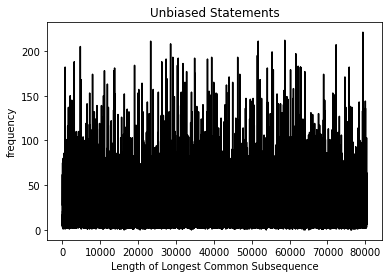

In [ ]:
plt.plot(similarity_bias0['lcslen'], 'black')
plt.xlabel('Length of Longest Common Subsequence')
plt.ylabel('frequency')
plt.title('Unbiased Statements')
plt.savefig("lcslen_bias_0",transparent=True)

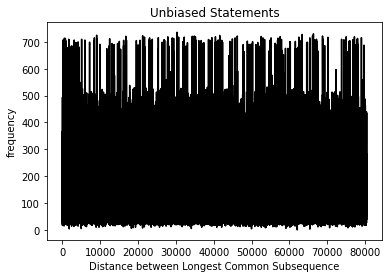

In [ ]:
plt.plot(similarity_bias0['lcsdist'], 'black')

plt.xlabel('Distance between Longest Common Subsequence')
plt.ylabel('frequency')
plt.title('Unbiased Statements')
plt.savefig('lcsdist_bias_0',transparent=True)

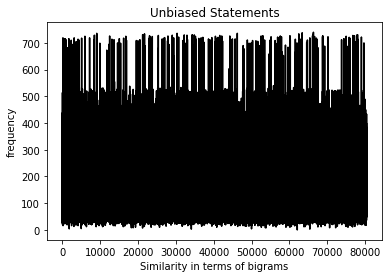

In [ ]:
plt.plot(similarity_bias0['qgram'], 'black')
plt.xlabel('Similarity in terms of bigrams')
plt.ylabel('frequency')
plt.title('Unbiased Statements')
plt.savefig('bigrams_bias0',transparent=True)

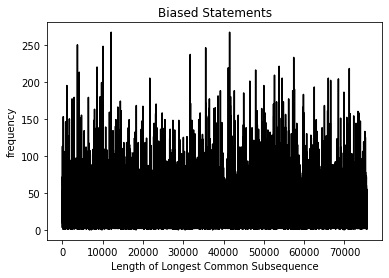

In [ ]:
plt.plot(similarity_bias1['lcslen'], 'black')
plt.xlabel('Length of Longest Common Subsequence')
plt.ylabel('frequency')
plt.title('Biased Statements')
plt.savefig("lcslen_bias_1",transparent=True)

In [ ]:
#wrong
plt.plot(similarity_bias1['lcsdist'], 'r')

plt.xlabel('Length of Longest Common Subsequence')
plt.ylabel('frequency')
plt.title('Uniased Statements')

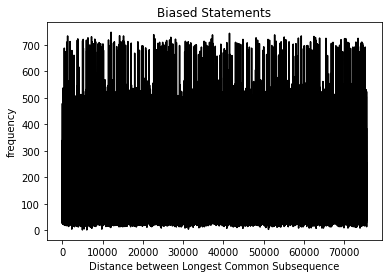

In [ ]:
plt.plot(similarity_bias1['lcsdist'], 'black')
plt.xlabel('Distance between Longest Common Subsequence')
plt.ylabel('frequency')
plt.title('Biased Statements')
plt.savefig('lcsdist_bias_1',transparent=True)

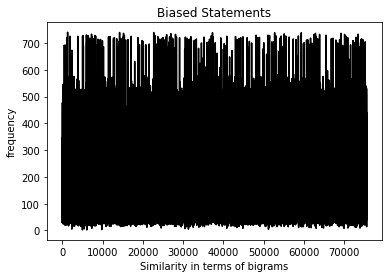

In [ ]:
plt.plot(similarity_bias1['qgram'], 'black')
plt.xlabel('Similarity in terms of bigrams')
plt.ylabel('frequency')
plt.title('Biased Statements')
plt.savefig('bigrams_bias1',transparent=True)

In [ ]:
# similarity_df = pd.DataFrame()
# id1 = []
# id2 = []
# lcsdist = []
# lcslen = []
# similarity_df
# for i in range (1, 2000):
#   for j in range (i, 2000):
#     id1.append(i)
#     id2.append(j)
#     lcsdist.append(lcs.distance(df1.loc[i].at['lemmatized'], df1.loc[j].at['lemmatized']))
#     lcslen.append(lcs.length(df1.loc[i].at['lemmatized'], df1.loc[j].at['lemmatized']))
# similarity_df['id1'] = id1
# similarity_df['id2'] = id2
# similarity_df['lcsdist'] = lcsdist
# similarity_df['lcslen'] = lcslen
# similarity_df
